In [1]:
import pandas as pd
import numpy as np
import missingno as msno

import datetime

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
pal = ['#009473', '#00537c','#b4b4b4', '#da3e21']



from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from kneed import KneeLocator

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import silhouette_score

In [2]:
customer_df = pd.read_csv('./data/marketing_campaign.csv', sep='\t')
customer_df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

## Explorating the dataset

In [3]:
# Dimension du dataset
customer_df.shape

(2240, 29)

In [4]:
#Information sur le dataset( nullité des variables, types)
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
customer_df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
customer_df.dtypes.value_counts()

int64      25
object      3
float64     1
dtype: int64

In [7]:
customer_df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Il y a 24 valeurs manquantes dans le dataset

<AxesSubplot:>

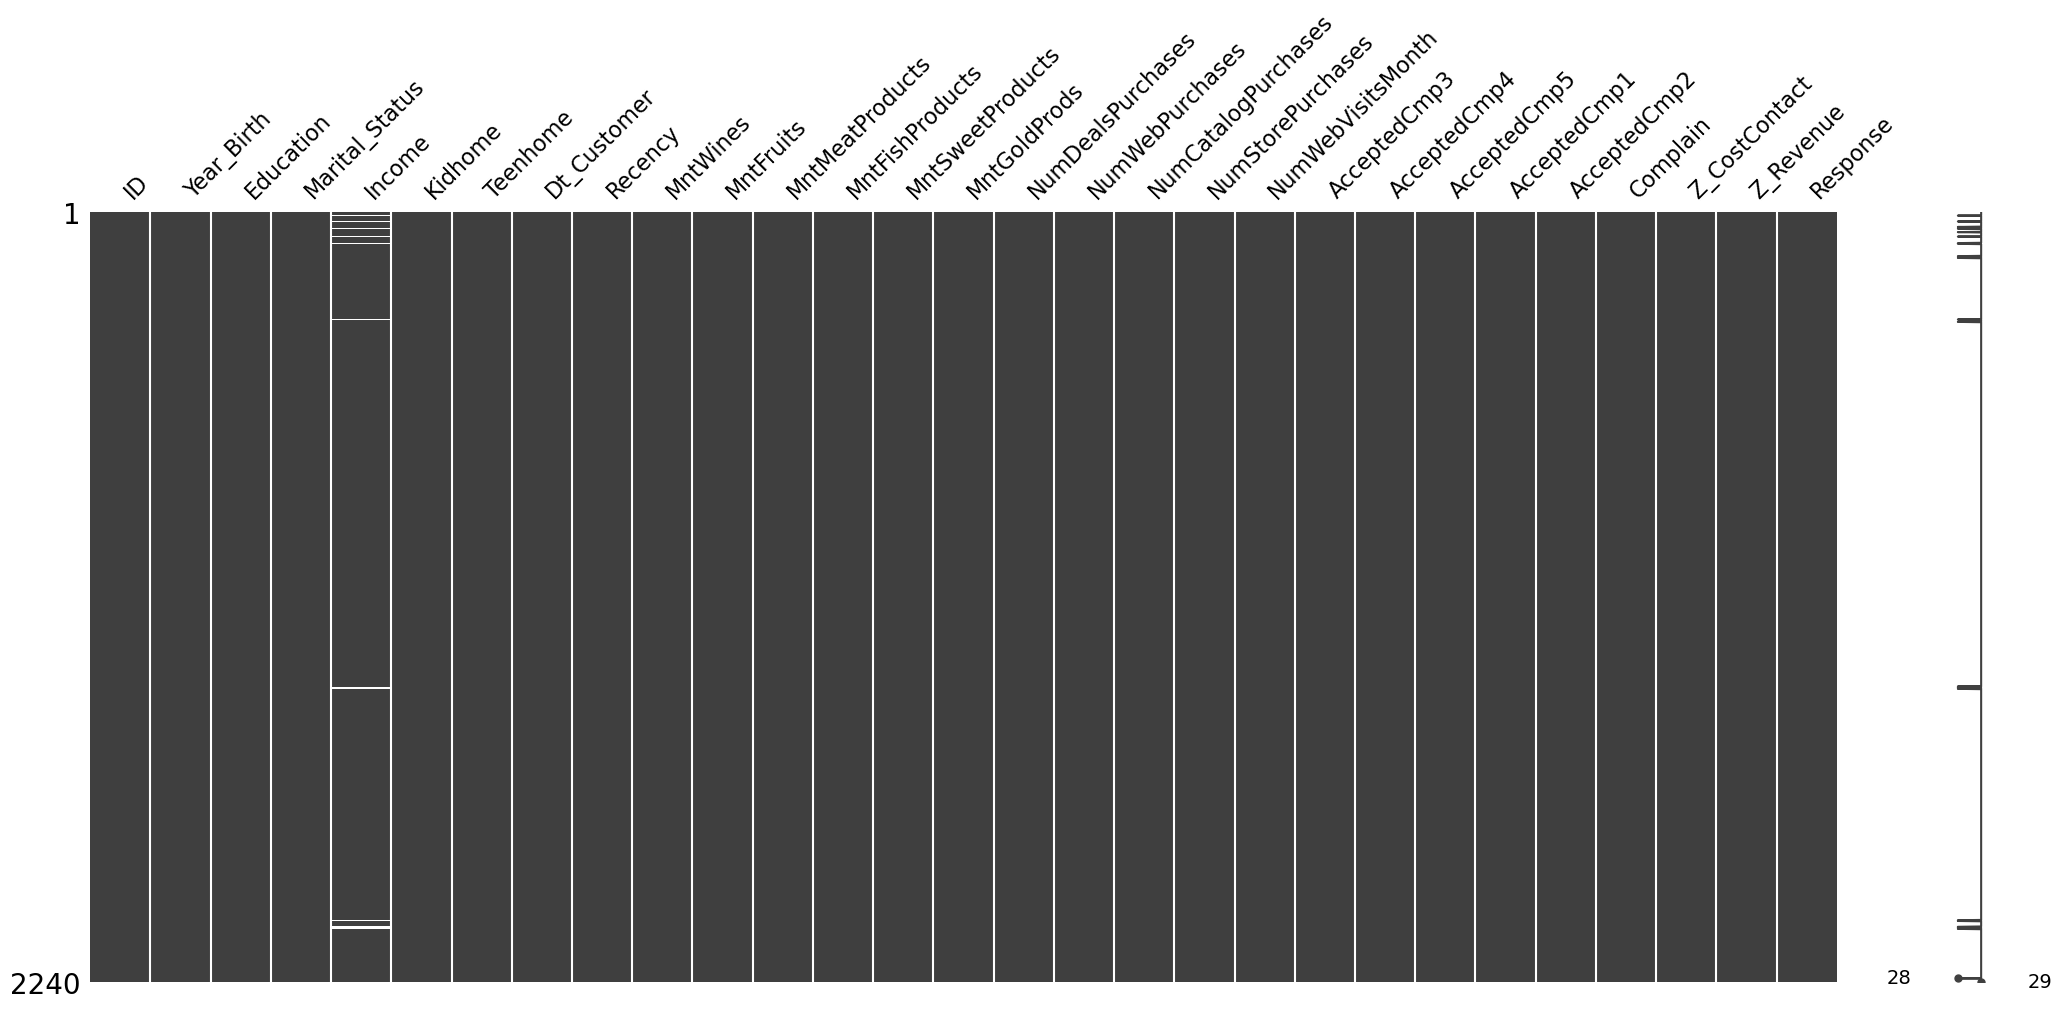

In [8]:
msno.matrix(customer_df)

In [9]:
# Les colonnes du dataset
customer_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [10]:
# description du dataset
customer_df.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

le describe renseigne sur les valeurs statistiques des variables et mets en évidence la présence de valeurs abérrantes.
On voit aussi qu'il y a des variables représentées par un seul nombre donc des constantes.

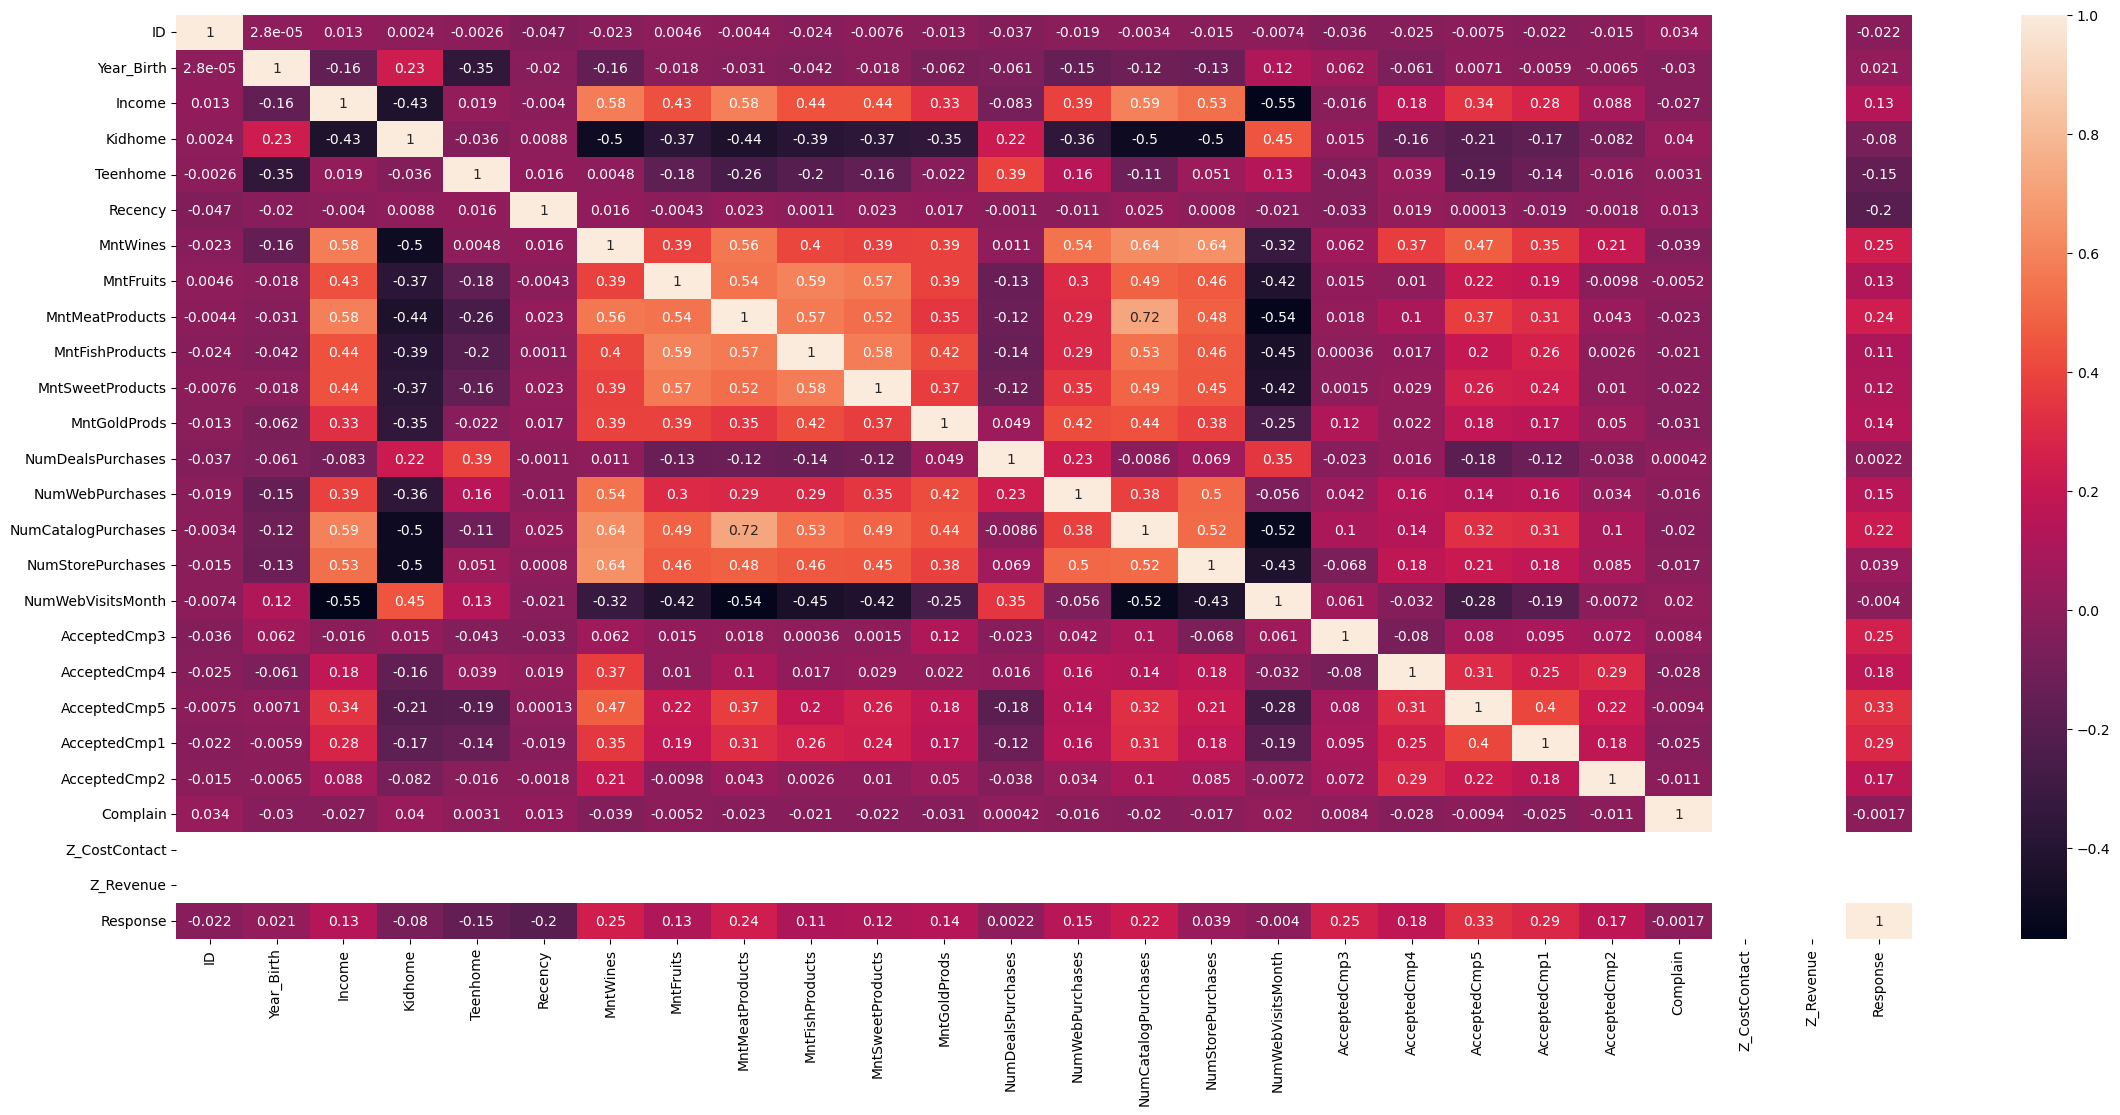

In [11]:
plt.figure(figsize=(28, 12))
sns.heatmap(customer_df.corr(), annot= True)
#plt.savefig("./plot/heatmap_customer1.png")
plt.show()

### Visualisation du dataset

In [12]:
fig = px.histogram(customer_df, x="Education", title = 'Distribution de Education')
fig.show()

il y a plus de clients de haut niveau que de clients non diplomés

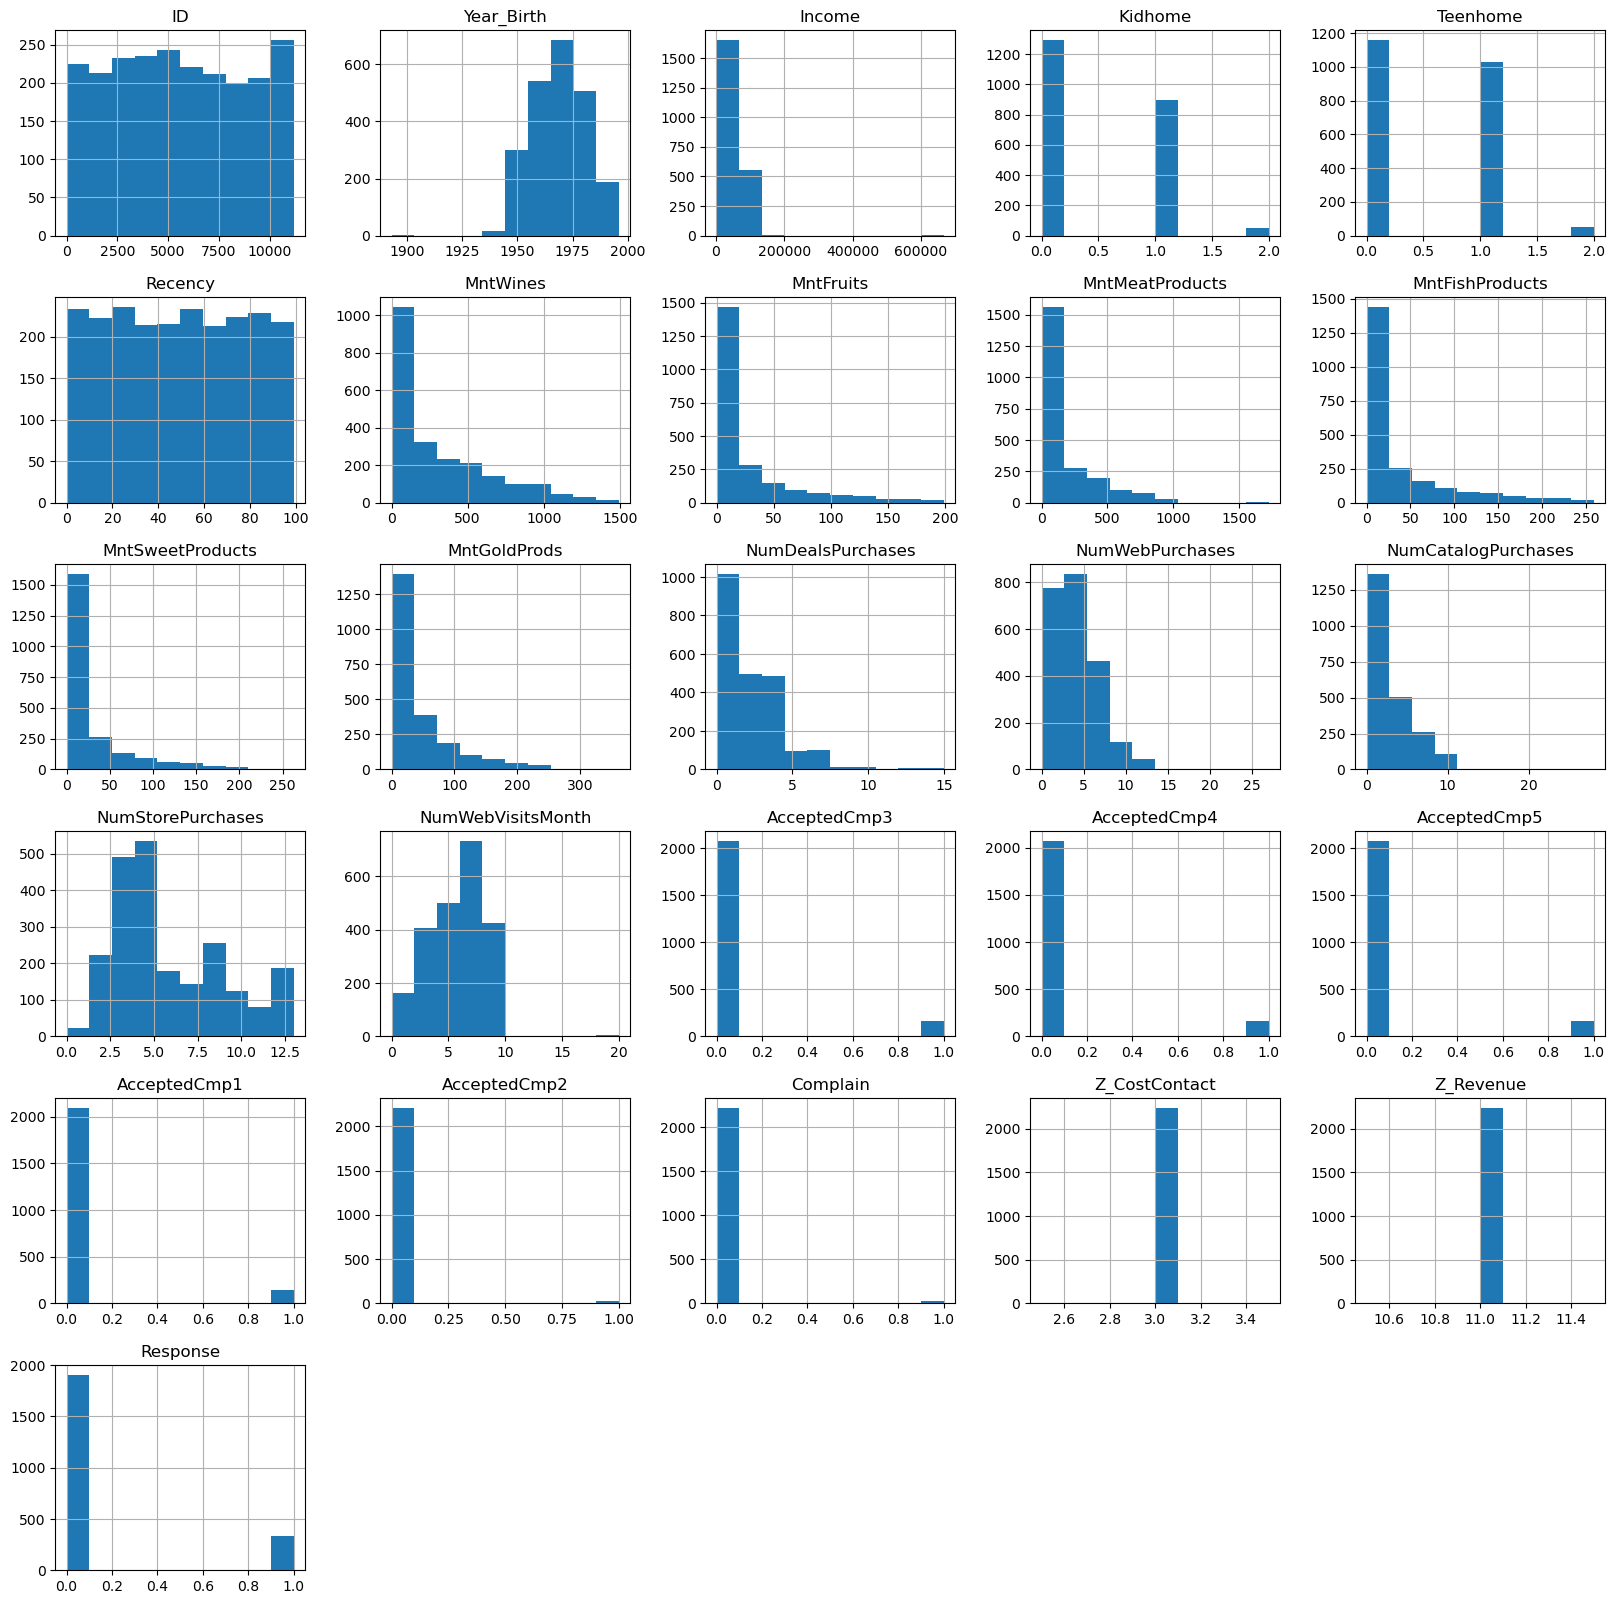

In [13]:
customer_df.hist(figsize=(20,20))
plt.show()

In [14]:
fig = px.histogram(customer_df, x="Marital_Status",text_auto=True, title = 'Distribution de la situation matrimoniale')
fig.show()

Il y a plus de clients mariés, viennent ensuite les concubinages et les célibataires. Mais cette répartition peut étre distribuée autrement.

In [15]:
fig = px.histogram(customer_df, x=customer_df.Income, nbins = 100, title = 'Distribution des revenues')
fig.show()

Les Income sont réparties entre 0 et 100k. Certaines valeurs sont très isolées du groupe. Un boxplot aidera à voir plus claire. 

In [16]:
fig = px.box(customer_df, y="Income")
fig.show()

Il y a présence de valeurs abérrantes qui seront supprimées plus tard.

In [17]:
fig = px.bar(customer_df, x="Marital_Status", y="Income", barmode="group")
fig.show()

Les clients mariés ont une revenus plus élevé que les autres classes de clients.

In [18]:
fig = px.bar(customer_df, x="Education", y="Income", barmode="group")
fig.show()

Les clients de haut niveau d'éducation ont aussi une revenue beaucoup plus importantes que ceux qu ne le sont pas.

### Manipulation des données

In [19]:
# Copier le dataset original
d1= customer_df.copy()

In [20]:
d1['Age'] = 2023 - d1['Year_Birth']

In [21]:
fig = px.histogram(d1, x=d1.Age, nbins=20)
fig.show()

Les ages varients entre 30 et 83 ans

In [22]:
#Détection et Suppression des outliers
Q1 = d1['Income'].quantile(0.25)
Q3 = d1['Income'].quantile(0.75)
IQR = Q3 - Q1

#outlier = d1[(d1['Income'] < (Q1 - 1.5 * IQR)) | (d1['Income'] > (Q3 + 1.5 * IQR))]

#print("Outliers Income :", len(outlier))

In [23]:
q1 = d1['Age'].quantile(0.25)
q3 = d1['Age'].quantile(0.75)
iqr = q3 - q1

#outliers = d1[(d1['Age'] < (q1 - 1.5 * iqr)) | (d1['Age'] > (q3 + 1.5 * iqr))]

#print("Outlier Age :", len(outliers))

In [24]:
d1 = d1[~((d1['Income'] < (Q1 - 1.5 * IQR)) | (d1['Income'] > (Q3 + 1.5 * IQR)))]

In [25]:
d1 = d1[~((d1['Age'] < (q1 - 1.5 * iqr)) | (d1['Age'] > (q3 + 1.5 * iqr)))]

In [26]:
# Conversion variable Dt_Customer en format date
d1['Dt_Customer'] = pd.to_datetime(d1['Dt_Customer'], format = '%d-%m-%Y')

In [27]:
d1['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2229, dtype: datetime64[ns]

In [28]:
max_date = d1['Dt_Customer'].max()
max_date

Timestamp('2014-06-29 00:00:00')

In [29]:
d1['Days_since_enrolment'] = d1['Dt_Customer'].apply(lambda x: (max_date - x).days)

In [30]:
fig = px.histogram(d1, x=d1.Days_since_enrolment, nbins = 100, title = "Distribution des jours d'enregistrements")
fig.show()

In [31]:
d1.drop(['ID','Year_Birth','Dt_Customer','Z_CostContact','Z_Revenue'], axis = 1, inplace = True)

In [32]:
# Re-classer les niveaux d'éducation
def classify_education(education) :
    if education in ['Graduation','PhD','Master']:
        return 'Graduated'
    else :
        return 'Undergraduated'

d1['Education_level'] = d1['Education'].apply(classify_education) 

In [33]:
# Suppression de la colonne Education
d1.drop('Education', axis= 1, inplace = True)

In [34]:
#Re-classer les status matrimoniales

def status_customer(marital_status):
    if marital_status in ['Together', 'Married'] :
        return 'Live_Together'
    else :
        return 'Not_live_toguether'
    
d1['Status_Marital'] = d1['Marital_Status'].apply(status_customer)
        

In [35]:
d1.drop('Marital_Status', axis = 1, inplace = True)

In [36]:
d1.dropna(axis=0, inplace = True)

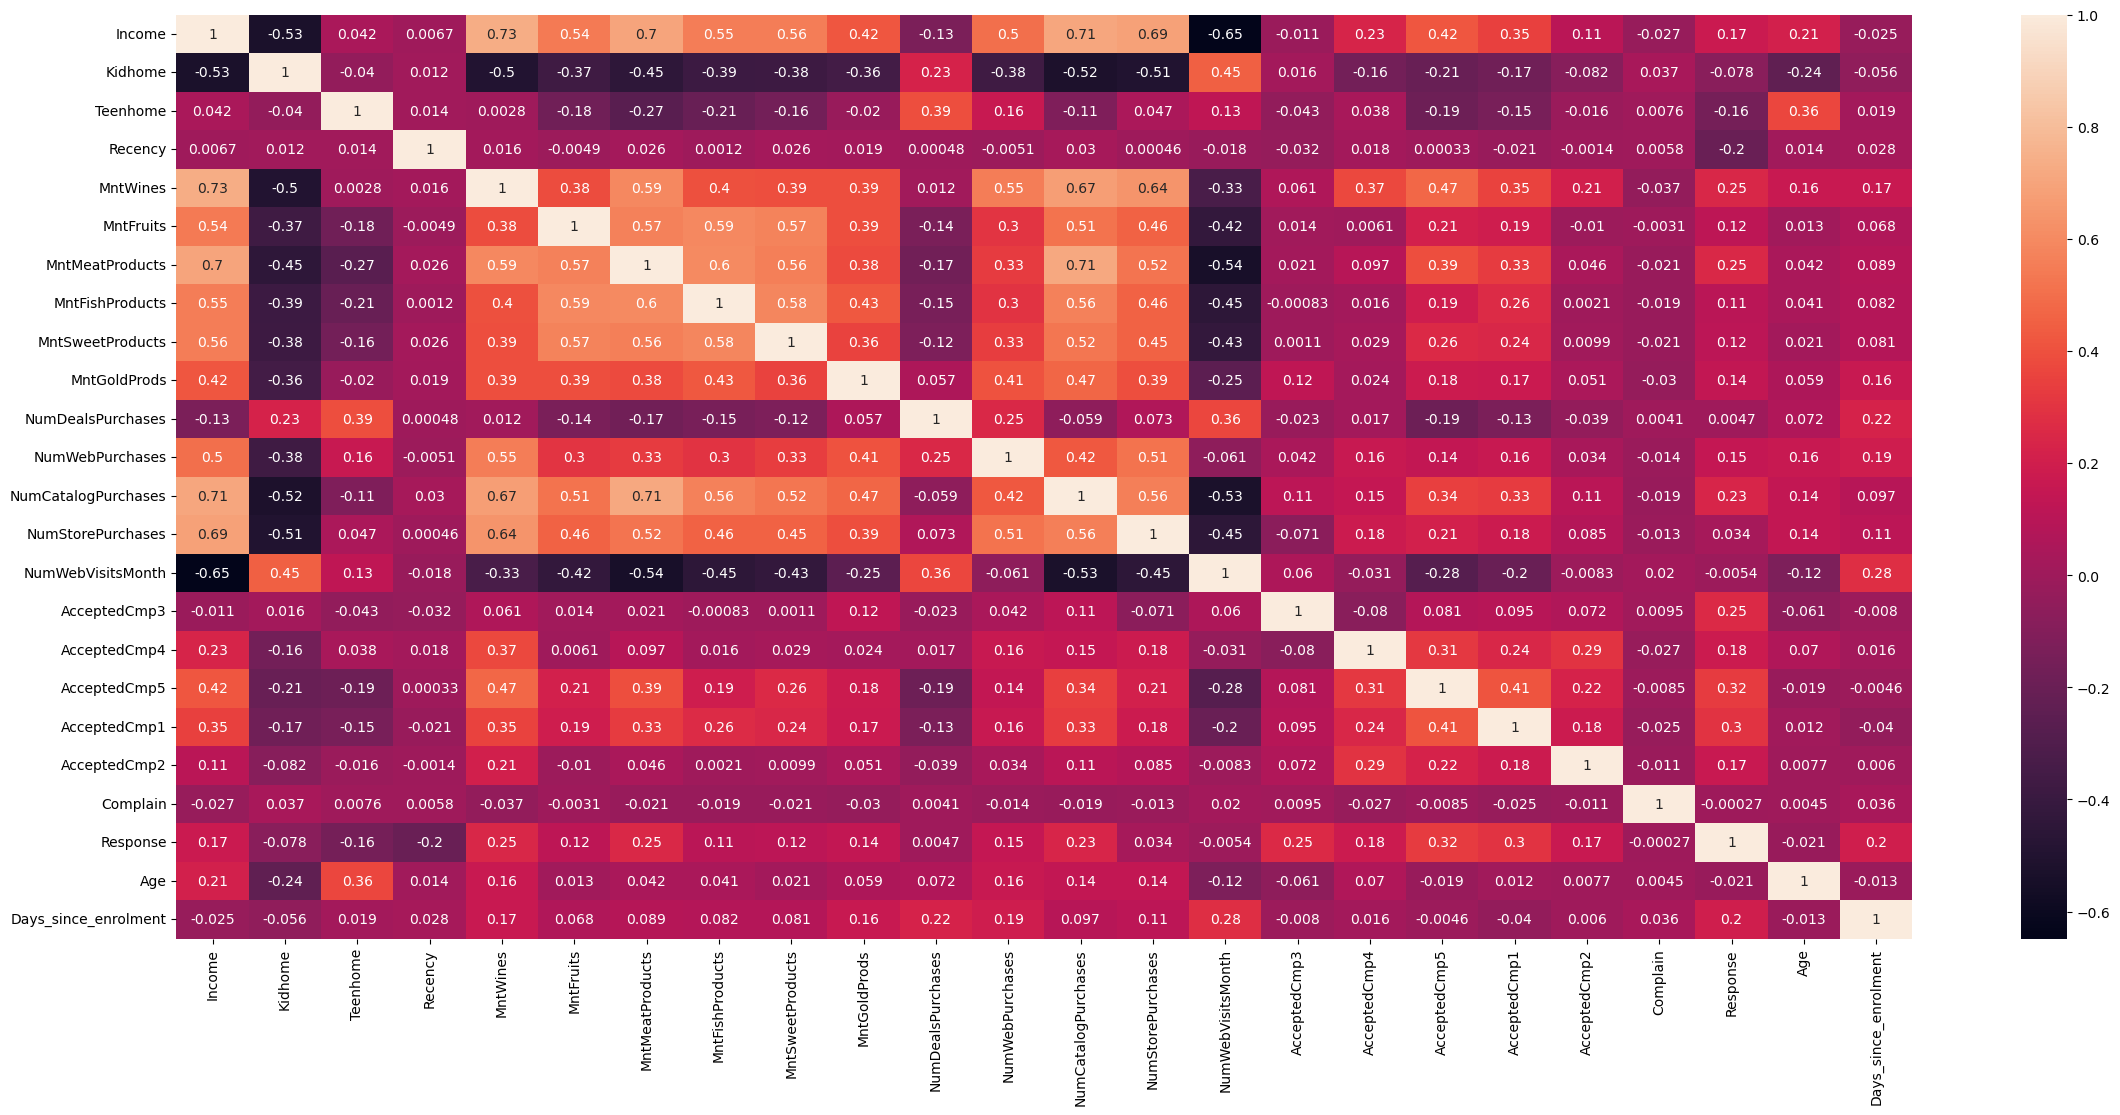

In [37]:
# Nouvelle matrice de corrélation aprés nettoyage
plt.figure(figsize=(28, 12))
sns.heatmap(d1.corr(), annot= True)
plt.show()

#### Encodage des variables catégorielles 

In [38]:
d1 = pd.get_dummies(d1, columns=['Status_Marital', 'Education_level'])

In [39]:
d1.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  AcceptedCmp1  \
0              172                88            88  ...             0   
1                2                 1             6  ...             0   
2              111                21            42  ...             0   
3               10                 3             5  ...             0   
4               46                27            15  ...             0   

   AcceptedCmp2  Complain  Response  Age  Days_since_enrolment  \
0             0         0         1   66                   663   
1             0         0         0   69                   113   
2             0         0         0   58                   312   
3             0         0         0   39                   139   
4             0         0         0   42                   161   

   Status_Marital_Live_Together  Status_Marital_Not_live_toguether  \
0                             0                                  1   
1                             0                                  1   
2                             1                                  0   
3                             1                                  0   
4                             1                                  0   

   Education_level_Graduated  Education_level_Undergraduated  
0                          1                               0  
1                          1                               0  
2                          1                               0  
3                          1                               0  
4                          1                               0  

[5 rows x 28 columns]

##### Feature engineering

Calcul de nouvelles variables qui nous serviront pour le clustering

In [40]:
d1['Amount_spent'] = d1['MntWines'] + d1['MntFruits']+ d1['MntMeatProducts']+d1['MntFishProducts']+d1['MntSweetProducts']+d1['MntGoldProds']

In [41]:
d1['Promotion'] = d1['AcceptedCmp3'] + d1['AcceptedCmp4']+ d1['AcceptedCmp5']+d1['AcceptedCmp1']+d1['AcceptedCmp2']+d1['Response']

In [42]:
d1['Parent'] = (d1['Kidhome'] + d1['Teenhome'] > 0).astype(int)

In [43]:
cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Days_since_enrolment',
       'Status_Marital_Live_Together', 'Status_Marital_Not_live_toguether',
       'Education_level_Graduated', 'Education_level_Undergraduated','Amount_spent','Promotion','Parent']

#### Normalisation des données avec StandarScaler

In [44]:
scaler = StandardScaler()

In [45]:
scaled_data = scaler.fit_transform(d1[cols])

In [46]:
df_scaled = pd.DataFrame(scaled_data, columns=d1.columns)

In [47]:
df_scaled.head()

Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  0.314651 -0.823405 -0.930767  0.310830  0.974566   1.548614   
1 -0.254877  1.038757  0.906602 -0.380600 -0.874776  -0.638664   
2  0.965354 -0.823405 -0.930767 -0.795458  0.355155   0.568110   
3 -1.206087  1.038757 -0.930767 -0.795458 -0.874776  -0.563241   
4  0.322136  1.038757 -0.930767  1.555404 -0.394659   0.417263   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0         1.748400         2.449154          1.480301      0.849556  ...   
1        -0.731678        -0.652345         -0.635399     -0.735767  ...   
2        -0.175957         1.336263         -0.149031     -0.039771  ...   
3        -0.667380        -0.506392         -0.586763     -0.755100  ...   
4        -0.217292         0.150396         -0.003121     -0.561768  ...   

   Response       Age  Days_since_enrolment  Status_Marital_Live_Together  \
0  2.370996  1.017189              1.527183                     -1.347625   
1 -0.421764  1.273530             -1.188629                     -1.347625   
2 -0.421764  0.333612             -0.205999                      0.742046   
3 -0.421764 -1.289883             -1.060245                      0.742046   
4 -0.421764 -1.033542             -0.951612                      0.742046   

   Status_Marital_Not_live_toguether  Education_level_Graduated  \
0                           1.347625                   0.359211   
1                           1.347625                   0.359211   
2                          -0.742046                   0.359211   
3                          -0.742046                   0.359211   
4                          -0.742046                   0.359211   

   Education_level_Undergraduated  Amount_spent  Promotion   Parent  
0                       -0.359211      1.679323   0.614920 -1.58466  
1                       -0.359211     -0.963897  -0.503808  0.63105  
2                       -0.359211      0.281242  -0.503808 -1.58466  
3                       -0.359211     -0.920675  -0.503808  0.63105  
4                       -0.359211     -0.307248  -0.503808  0.63105  

[5 rows x 31 columns]

In [48]:
df_scaled.replace([np.inf, -np.inf], np.nan, inplace=True)

#### Réduction de dimension avec PCA

In [49]:
pca = PCA(n_components=31)

In [50]:
x_red = pca.fit_transform(df_scaled)

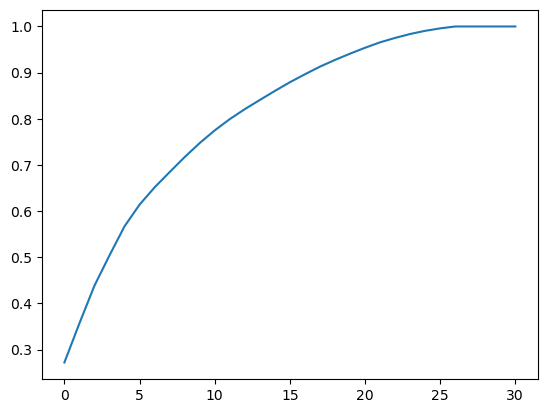

In [51]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

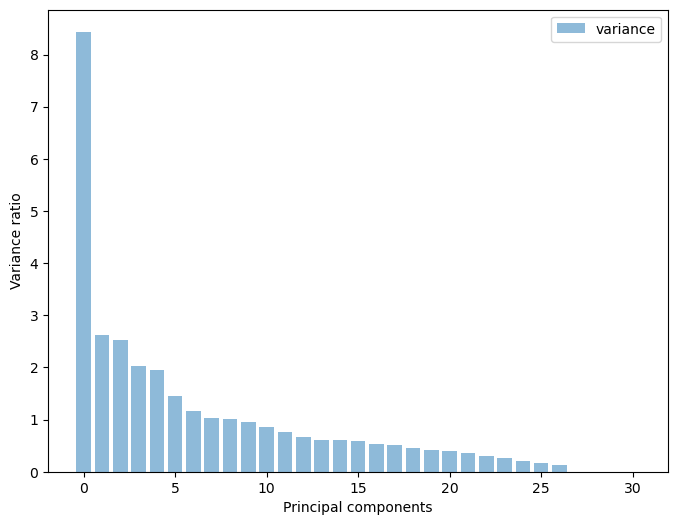

In [52]:
pca= PCA(n_components=31)
pca.fit_transform(df_scaled)
pca_variance = pca.explained_variance_
pca_variance

plt.figure(figsize=(8, 6))
plt.bar(range(31), pca_variance, alpha=0.5, align='center', label='variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

D'après ces deux analyses, pour préserver 95 à 97% de la variance du dataset, le nombre de component correspondrait aux environs de 20. Ce qui n'est pas adéquat avec notre dataset donc on choisit finalement 3 components qui correspond au mieux à notre dataset

In [53]:
pca = PCA(n_components =3)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])

#### Recherche de K optimal avec elbow method

In [54]:
sse = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)

In [55]:
cluster_df = pd.DataFrame({'Cluster':range(1,13), 'sse':sse})
cluster_df.head()

Cluster           sse
0        1  29974.313977
1        2  15714.742462
2        3  11527.335871
3        4   8493.203109
4        5   7307.594372

Text(0, 0.5, 'Inertia')

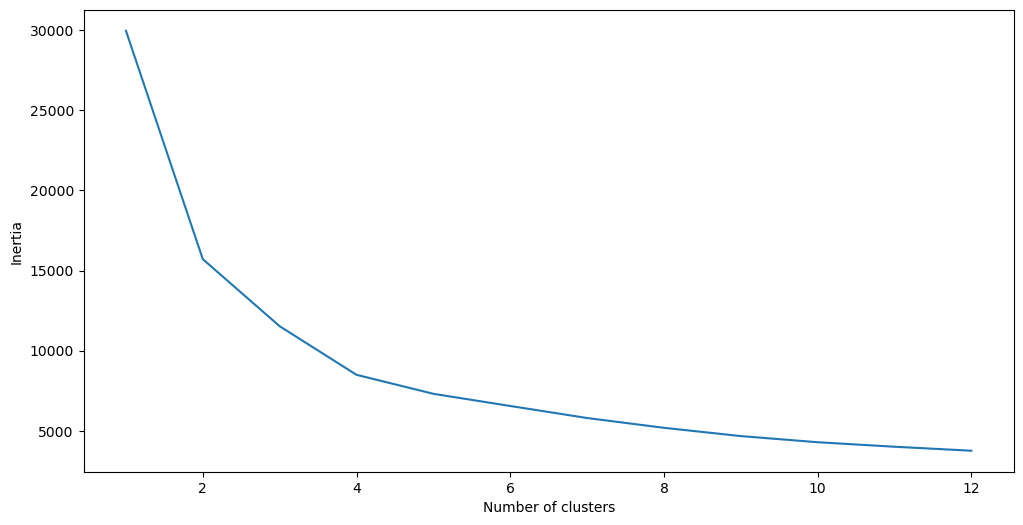

In [56]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df['Cluster'], cluster_df['sse'])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [57]:
kl = KneeLocator(range(1, 13), sse, curve="convex", direction="decreasing" )

In [58]:
kl.elbow

4

Le nombre de K optimal est 4 clusters.

##### Application avec l'algorithme de K- Means

In [59]:
kmeans = KMeans(kl.elbow)
kmeans.fit(df_pca)

KMeans(n_clusters=4)

In [60]:
kmeans = KMeans(n_clusters=4)
preds = kmeans.fit_predict(df_pca)
centre = kmeans.cluster_centers_

Visualiser tous les clusters

In [61]:
X= df_pca.values
Y =preds

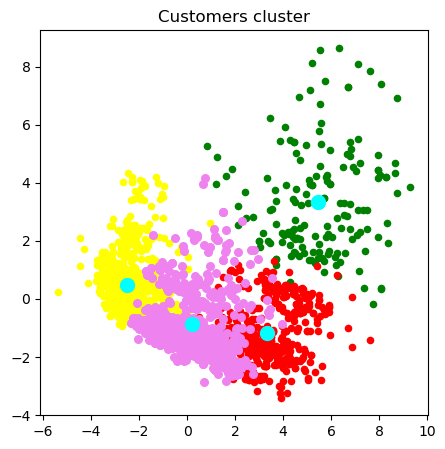

In [62]:
plt.figure(figsize=(5,5))
plt.scatter(X[Y==0,0], X[Y==0,1], s=20, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=20, c='yellow', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=20, c='red', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=30, c='violet', label='Cluster 4')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='cyan',label='Centroids')

plt.title('Customers cluster')
plt.show()

##### Implémentation avec CAH algorithme

In [63]:
cah = AgglomerativeClustering(n_clusters=4)
preds_cah = cah.fit_predict(df_pca)

In [64]:
Y1 =preds_cah

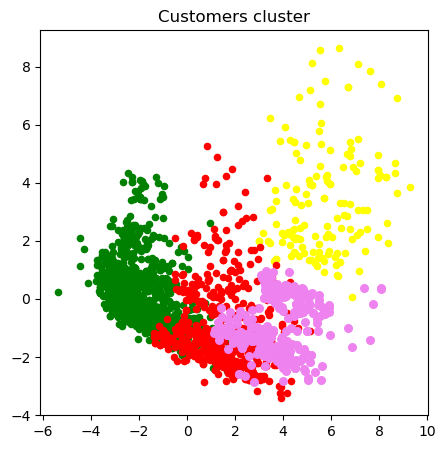

In [65]:
plt.figure(figsize=(5,5))
plt.scatter(X[Y1==0,0], X[Y1==0,1], s=20, c='green', label='Cluster 1')
plt.scatter(X[Y1==1,0], X[Y1==1,1], s=20, c='yellow', label='Cluster 2')
plt.scatter(X[Y1==2,0], X[Y1==2,1], s=20, c='red', label='Cluster 3')
plt.scatter(X[Y1==3,0], X[Y1==3,1], s=30, c='violet', label='Cluster 4')

plt.title('Customers cluster')
plt.show()

#### Algorithme DBScan algorithme

In [66]:
# Recherche epsilon avec Nerarest Neighbor
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_pca)
distances, indices = nbrs.kneighbors(df_pca)

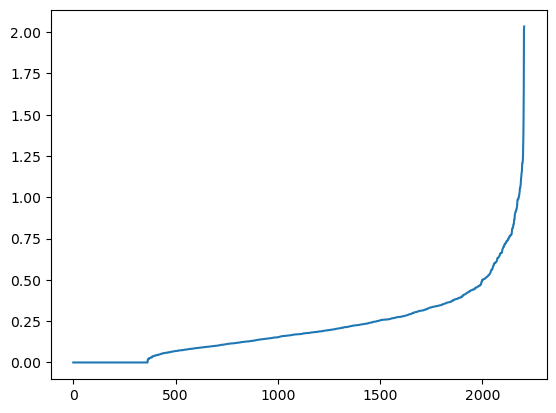

In [67]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

epsilon = 0.5 d'aprés notre courbe

In [68]:
dbscan = DBSCAN(eps = 0.5, min_samples=10).fit_predict(df_pca)

In [69]:
Y2= dbscan

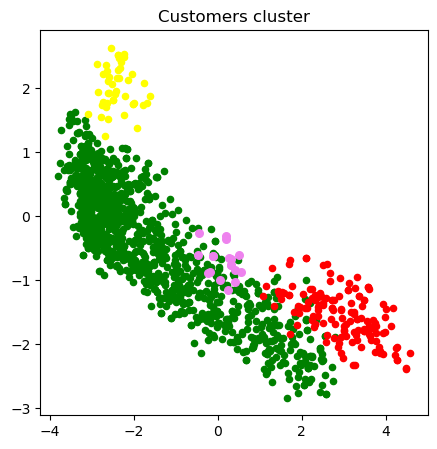

In [70]:
plt.figure(figsize=(5,5))
plt.scatter(X[Y2==0,0], X[Y2==0,1], s=20, c='green', label='Cluster 1')
plt.scatter(X[Y2==1,0], X[Y2==1,1], s=20, c='yellow', label='Cluster 2')
plt.scatter(X[Y2==2,0], X[Y2==2,1], s=20, c='red', label='Cluster 3')
plt.scatter(X[Y2==3,0], X[Y2==3,1], s=30, c='violet', label='Cluster 4')

plt.title('Customers cluster')
plt.show()

##### Comparaison et évaluation des différents modèles

In [71]:
X =df_pca
y_pred1 = preds
y_pred2 = preds_cah
y_pred3 = dbscan
score1=silhouette_score(df_pca,y_pred1)
score2=silhouette_score(df_pca,y_pred2)
score3=silhouette_score(df_pca,y_pred3)

print("Score pour l'algorithme de Kmean:", score1)
print("Score pour l'algorithme de Agglomerative clustering:",score2)
print("Score pour l'algorithme de Dbsccan:",score3)

Score pour l'algorithme de Kmean: 0.4056225112399572
Score pour l'algorithme de Agglomerative clustering: 0.38857929008928044
Score pour l'algorithme de Dbsccan: -0.2603455209738956


K-Means est plus performant que les autres. Par contre, DBScan semble ne pas étre adapté à nos données car score très mauvais

##### Tentative de profiling

In [72]:
#Rajouter la colonne cluster dans  le dataset
df_pca['clusters'] = preds

In [73]:
# Nombre de personnes dans chaque cluster
df_pca['clusters'].value_counts()

1    991
3    617
2    433
0    164
Name: clusters, dtype: int64

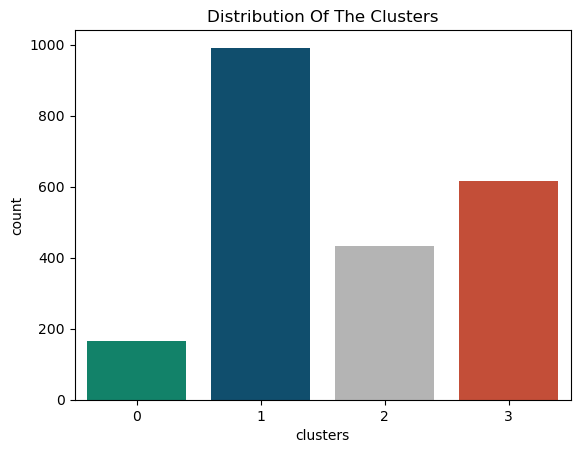

In [74]:
pl = sns.countplot(x=df_pca["clusters"], palette=pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

##### profiling basé sur les revenues et les dépenses sur les produits achetés

In [75]:
d1['clusters'] = preds

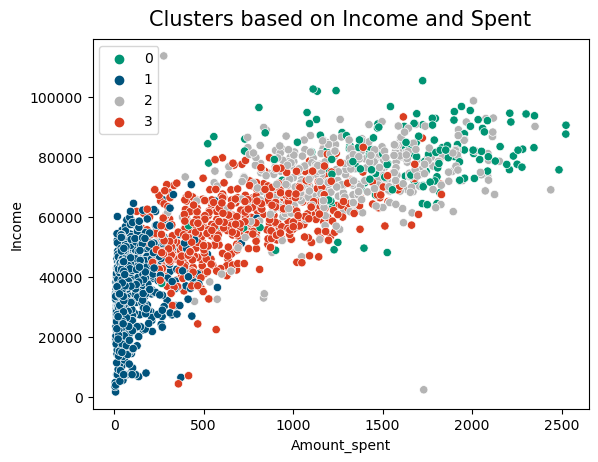

In [76]:
pl = sns.scatterplot(data = d1, x = d1['Amount_spent'], y = d1['Income'], hue =d1['clusters'],palette=pal )
pl.set_title('Clusters based on Income and Spent', pad=10, size=15)
plt.legend()
plt.show()

Analyse :
    .groupe 0 (vert) : revenue élevée et dépense élevée
    .groupe 1 (bleu) : plus petite revenue et moins de dépense
    .groupe 2 (gris) :  revenue importante et dépense légèrement élevée
    .groupe 3 (orange) :  revenue à la moyenne et dépense moyen

Gràce aux algorithmes de K-means, CAH et DBScan, nous avons pu faire une classification des clients de l'épicerie.
Pousse l'analyse avec le profiling permet de déceler les habitudes des clients. Dans notre cas, nous avons tenter de faire le profiling en se 
basant sur les revenues des clients et les dépenses efféctuées sur les produits. L'algorithme de K-means est plus adapté par rapport 
aux autres algorithmes.